In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

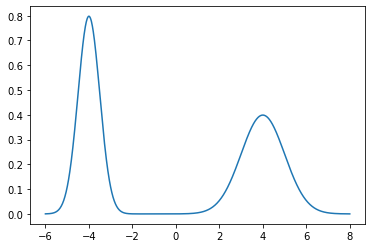

In [2]:
x = np.linspace(-6, 8, 1000)

def p_function(points):
    return sts.norm.pdf(points, loc=-4, scale=0.5) + sts.norm.pdf(points, loc=4, scale=1)

plt.plot(x, p_function(x))

In [3]:
def q_function(x, x_2, epsilon):
    return sts.norm.pdf(x, loc=x_2, scale=epsilon)

def q_sample(center, epsilon):
    return sts.norm.rvs(loc=center, scale=epsilon)

In [4]:
def walk(e=0.5, sample_size=1000):
    point_x = np.random.choice(x)
    only_accepted = []
    accepted = []
    for t in range(sample_size):
        x_star = q_sample(point_x, e)
        a = p_function(x_star)/p_function(point_x) * q_function(point_x, x_star, e)/q_function(x_star, point_x, e)
        probability = min(1, a)
        n = np.random.random()
        if probability > n:
            only_accepted.append(x_star)
            point_x = x_star
        accepted.append(point_x)
            
    plt.figure(figsize=(12,8))
    plt.plot(x, p_function(x), label="target distribution")
    plt.axhline(0, c="black")
    plt.plot(accepted, np.linspace(0, 1, len(accepted)), linewidth=0.8, label="sample sequence")
    plt.scatter(accepted, sts.uniform.rvs(loc=-0.075, scale=0.05, size=len(accepted)), alpha=0.4, label="samples")
    plt.legend()
    plt.title(f"Random walk with e={e}")
    plt.show()
    print(f'Acceptance rate = {len(only_accepted)/ sample_size}')
    return only_accepted

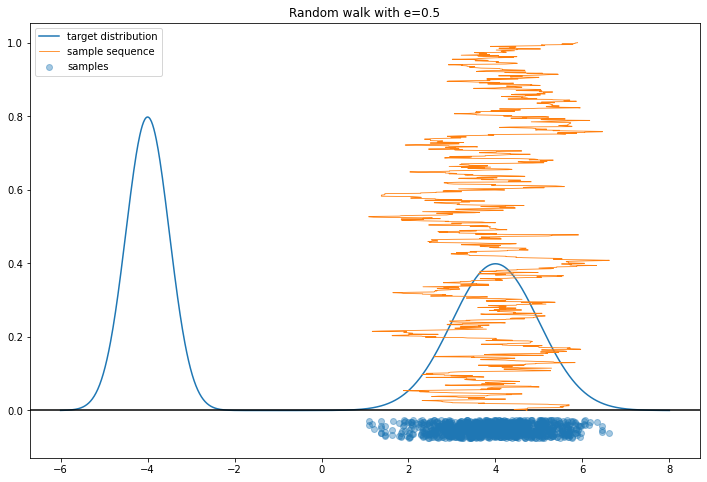

Acceptance rate = 0.857


In [5]:
a_0_5=walk()

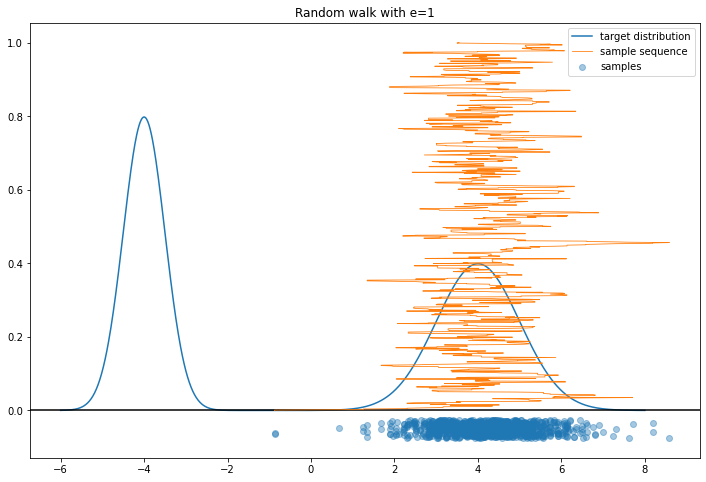

Acceptance rate = 0.677


In [6]:
a_1=walk(1)

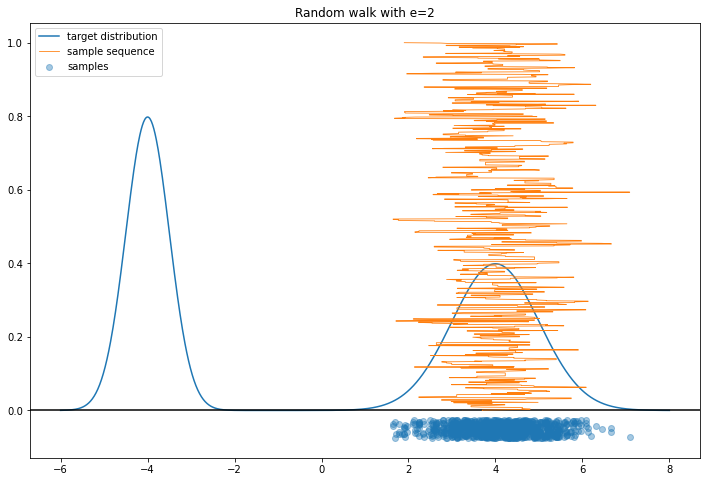

Acceptance rate = 0.505


In [7]:
a_2=walk(2)

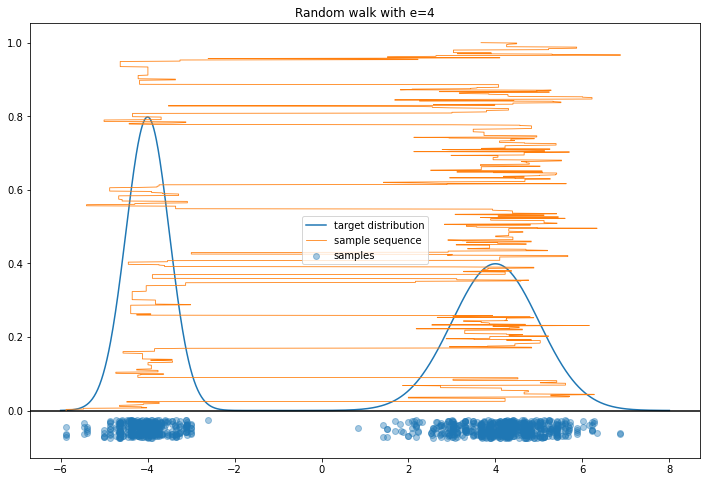

Acceptance rate = 0.287


In [8]:
a_4=walk(4)

In [9]:
def plot_acf(x): 
    '''
    Plot the autocorrelation function for a series x. This corresponds to the
    acf() function in R. The series x is detrended by subtracting the mean of
    the series before computing the autocorrelation.
    The autocorrelation at lag = 0 is always 1 since the series is perfectly
    correlated with itself. You can ignore this value. The autocorrelation at
    all other values should be as small as possible, since independent samples
    have no correlation.
    '''
    from scipy import signal
    import matplotlib.pyplot as plt 
    plt.acorr(
        x, maxlags=20, detrend=lambda x: signal.detrend(x, type='constant')
    )

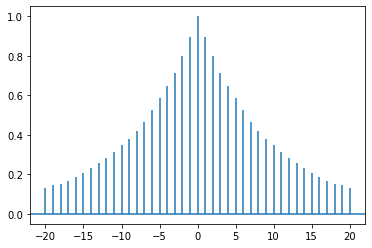

In [10]:
plot_acf(a_0_5)

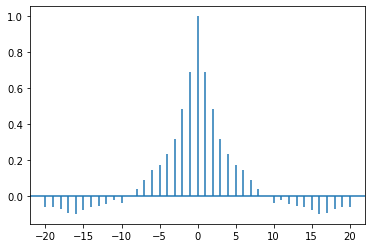

In [11]:
plot_acf(a_1)

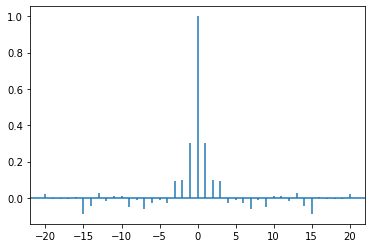

In [12]:
plot_acf(a_2)

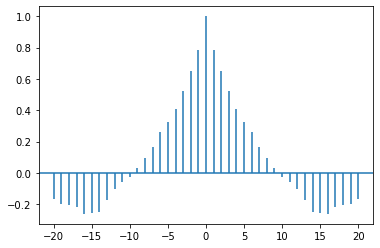

In [13]:
plot_acf(a_4)